In this assignment, I am going to solve the one-dimensional Schrodinger equation using numerical methods. Basically, the solutios involved finding the turning points (potential barrier) of the potential well at certain energy level, solve the equation using Numerov method and find the eigenvalues of energy.

Before we start our solutions, we have to import certain libraries as well as define the constants provided. 

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar

alpha = 1
l=4
h=1
m=1

The eigenvalues of the Schrodinger equation is given by  \begin{aligned}E_n=\frac{\hbar^2}{2m}\alpha^2\left[\frac{\lambda\left(\lambda-1\right)}{2}-\left(\lambda-1-n\right)^2\right], n = 0, 1, 2, 3, \dots \end{aligned}

Thus, by providing the first 10 values of x, we can determine the first 10 eigenvalues

In [18]:
def E(n):
    return ((h**2)/2*m) *(alpha**2) *((l*(l-1)/2) - (l-1-n)**2)

y=[]
x = [0,1,2,3,4,5,6,7,8,9,10]
for i in x:
    ans=E(i)
    y.append(ans)

print (y)


[-1.5, 1.0, 2.5, 3.0, 2.5, 1.0, -1.5, -5.0, -9.5, -15.0, -21.5]


Next, consider the following potential well \begin{aligned}V\left(x\right)=\frac{\hbar^2}{2m}\alpha^2\lambda\left(\lambda-1\right)\left[\frac 1 2-\frac{1}{\cosh^2{\left(\alpha x\right)}}\right]\end{aligned}

By giving a initial guess of energy level, in this case is $E_guess =2.5$, we are able to determine the turning points of the potential well. The turning points can be determined by looking at the intersection between $E$ and $V(x)$, where $E=V(x)$

TTo find the turning points, bisection method is used. since $E=V(x)$, we can rearrange the equation so that function used in the method is $E-V(x)=0$

The turning point is -1.914084553718567 after 23 iterations
The turning point is 1.914084553718567 after 23 iterations


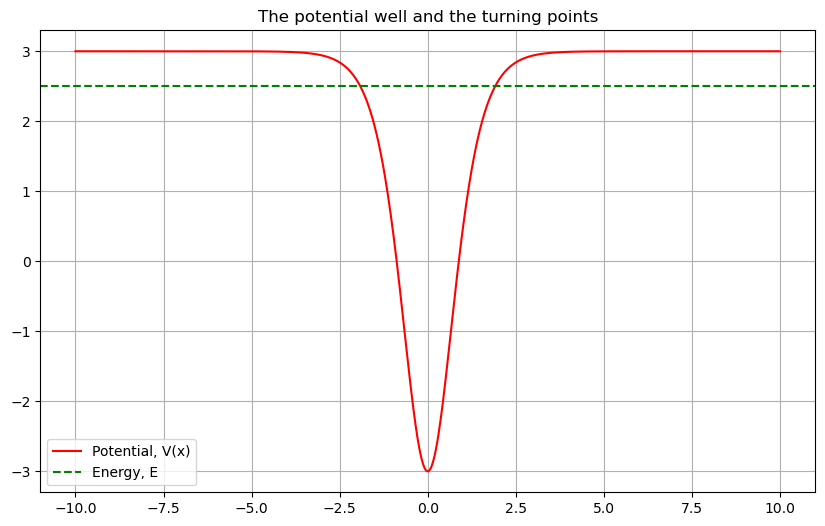

In [19]:
def potential(x,E):
    return E - (h ** 2 / (2 * m) * (alpha ** 2) * l * (l - 1) * (0.5 - 1 / (np.cosh(alpha * x)) ** 2) )

def bisection_method(E_guess, x_0, x_1,max_iter = 1000,tol=1*10**-6):
    for i in range (max_iter):
        c=(x_0 + x_1) / 2
        if potential(c, E_guess) == 0 or (x_1-x_0) /2 < tol :
            print ('The turning point is', c, 'after', i,'iterations')
            break
        if potential(x_0, E_guess) * potential(c, E_guess) < 0:
            x_1 = c
        else:
            x_0 = c
E_guess =2.5
#Left turning points
xleft=bisection_method(2.5, -10, 0,max_iter = 1000,tol=1*10**-6)

#Right turning points
xright=bisection_method(2.5, 0, 10,max_iter = 1000,tol=1*10**-6)

def V(x):
    return h ** 2 / (2 * m) * (alpha ** 2) * l * (l - 1) * (0.5 - 1 / (np.cosh(alpha * x)) ** 2)

y=[]
x = np.linspace(-10,10,1000)
for i in x:
    ans=V(i)
    y.append(ans)

plt.figure(figsize=(10, 6))
plt.title('The potential well and the turning points')
plt.plot(x,y,color='red',label='Potential, V(x)')
plt.axhline(y=E_guess, color ="green", linestyle ="--",label='Energy, E')
plt.grid()
plt.legend()
plt.show()

Therefore, from the graph above, the turning points are -1.914084553718567 and 1.914084553718567. This indicates that the for the region $x<-1.914084553718567$ and $x>1.914084553718567$, $E-V(x) < 0$. 

Now, we know the boundaries of the potential well. We can start to use Numerov method to solve the Schrodinger equation. First, the wavefunction is iterated from left boundary, which is far away from the potential well, to the left turning points and iterated from right boundary to the right turning points. 

However, since the equations involve in Numerov method is 
\begin{aligned}{\psi\left(x_{i+1}\right)=\frac{\psi\left(x_{i}\right)\left(2+\frac{5}{6}h^2k^2\left(x_{i}\right)\right)-\psi\left(x_{i-1}\right)\left(1-\frac{1}{12}h^2k^2\left(x_{i-1}\right)\right)}{1-\frac{1}{12}h^2k^2\left(x_{i+1}\right)}} \end{aligned}
and 
\begin{aligned}{\psi\left(x_{i-1}\right)=\frac{\psi\left(x_{i}\right)\left(2+\frac{5}{6}h^2k^2\left(x_{i}\right)\right)-\psi\left(x_{i+1}\right)\left(1-\frac{1}{12}h^2k^2\left(x_{i+1}\right)\right)}{1-\frac{1}{12}h^2k^2\left(x_{i-1}\right)}} \end{aligned}
we need two arbitrary starting points. Thus, we set the first starting point as 0 and the second point as $1e-5$

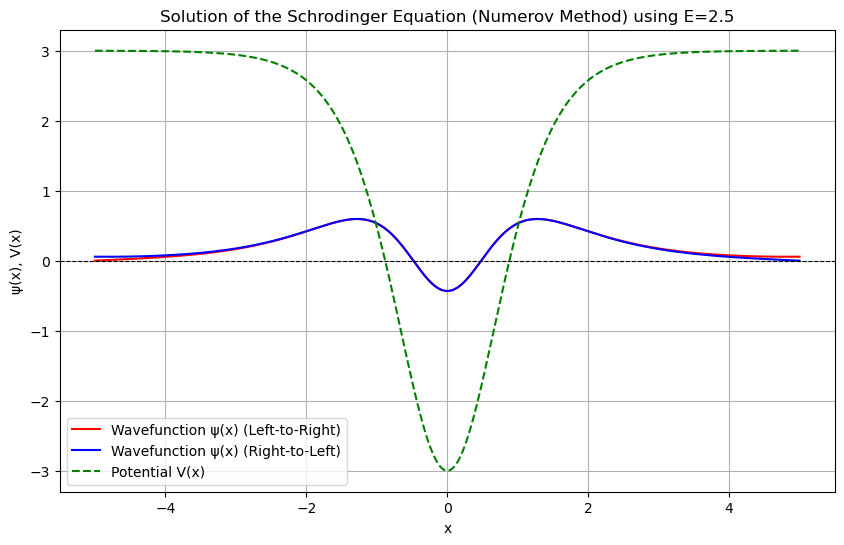

In [20]:
def numerov(E, V, x, h, direction="lr"):
    # Calculate k^2 at each point
    k2 = 2 * (E - V(x))

    # Initialize psi array
    psi = np.zeros_like(x)

    if direction == "lr":
        # Boundary conditions for left-to-right
        psi[0] = 0.0
        psi[1] = psi[0]+1e-5  # Small non-zero value to start iteration

        # Iterate using the Numerov formula
        for i in range(1, len(x) - 1):
            psi[i + 1] = (
                (2 * (1 - 5 * h**2 * k2[i] / 12) * psi[i] - (1 + h**2 * k2[i - 1] / 12) * psi[i - 1])
                / (1 + h**2 * k2[i + 1] / 12)
            )

    elif direction == "rl":
        # Boundary conditions for right-to-left
        psi[-1] = 0.0
        psi[-2] = 1e-5  # Small non-zero value to start iteration

        # Iterate using the Numerov formula (right-to-left)
        for i in range(len(x) - 2, 0, -1):
            psi[i - 1] = (
                (2 * (1 - 5 * h**2 * k2[i] / 12) * psi[i] - (1 + h**2 * k2[i + 1] / 12) * psi[i + 1])
                / (1 + h**2 * k2[i - 1] / 12)
            )

    return psi

# Define the parameters
x_min, x_max = -5, 5  # Range of x
N = 10000  # Number of points
h = (x_max - x_min) / N  # Step size
x = np.linspace(x_min, x_max, N)

# Define potential function (e.g., Poschl-Teller potential)
def V(x, m=1, hbar=1, l=4, alpha=1):
    return (hbar ** 2 / (2 * m)) * (alpha ** 2) * l * (l - 1) * (0.5 - 1 / (np.cosh(alpha * x)) ** 2)

# Parameters for the potential
m = 1
hbar = 1
l = 4
alpha = 1

E = 2.5  # Trial energy level

# Solve the Schrodinger equation left-to-right
psi_lr = numerov(E, lambda x: V(x, m, hbar, l, alpha), x, h, direction="lr")

# Solve the Schrodinger equation right-to-left
psi_rl = numerov(E, lambda x: V(x, m, hbar, l, alpha), x, h, direction="rl")

# Normalize the wavefunctions
psi_lr_norm = psi_lr / np.sqrt(np.sum(psi_lr**2) * h)
psi_rl_norm = psi_rl / np.sqrt(np.sum(psi_rl**2) * h)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x, psi_lr_norm, color='red', label="Wavefunction \u03C8(x) (Left-to-Right)")
plt.plot(x, psi_rl_norm, color='blue', label="Wavefunction \u03C8(x) (Right-to-Left)")
plt.plot(x, V(x, m, hbar, l, alpha), label="Potential V(x)", linestyle="--", color="green")
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.title("Solution of the Schrodinger Equation (Numerov Method) using E=2.5")
plt.xlabel("x")
plt.ylabel("\u03C8(x), V(x)")
plt.legend()
plt.grid()
plt.show()


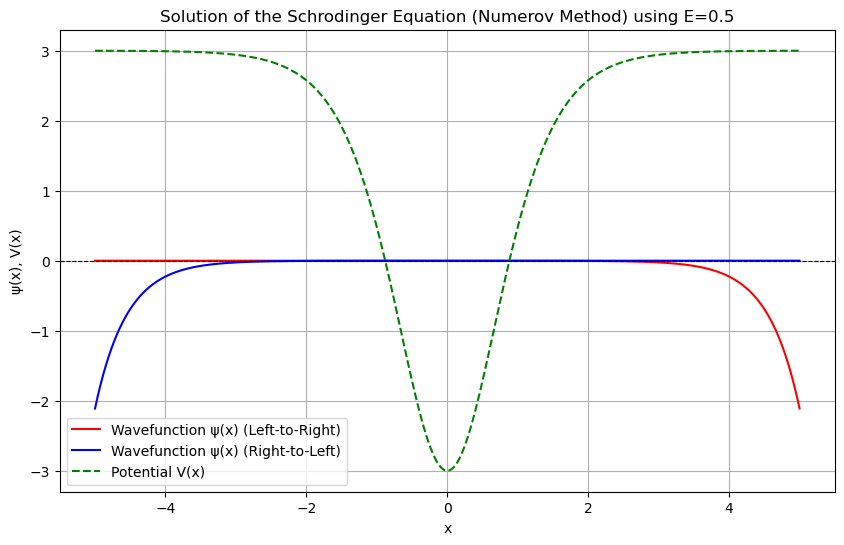

In [21]:
def numerov(E, V, x, h, direction="lr"):
    # Calculate k^2 at each point
    k2 = 2 * (E - V(x))

    # Initialize psi array
    psi = np.zeros_like(x)

    if direction == "lr":
        # Boundary conditions for left-to-right
        psi[0] = 0.0
        psi[1] = 1e-5  # Small non-zero value to start iteration

        # Iterate using the Numerov formula
        for i in range(1, len(x) - 1):
            psi[i + 1] = (
                (2 * (1 - 5 * h**2 * k2[i] / 12) * psi[i] - (1 + h**2 * k2[i - 1] / 12) * psi[i - 1])
                / (1 + h**2 * k2[i + 1] / 12)
            )

    elif direction == "rl":
        # Boundary conditions for right-to-left
        psi[-1] = 0.0
        psi[-2] = 1e-10  # Small non-zero value to start iteration

        # Iterate using the Numerov formula (right-to-left)
        for i in range(len(x) - 2, 0, -1):
            psi[i - 1] = (
                (2 * (1 - 5 * h**2 * k2[i] / 12) * psi[i] - (1 + h**2 * k2[i + 1] / 12) * psi[i + 1])
                / (1 + h**2 * k2[i - 1] / 12)
            )

    return psi

# Define the parameters
x_min, x_max = -5, 5  # Range of x
N = 10000  # Number of points
h = (x_max - x_min) / N  # Step size
x = np.linspace(x_min, x_max, N)

# Define potential function (e.g., Poschl-Teller potential)
def V(x, m=1, hbar=1, l=4, alpha=1):
    return (hbar ** 2 / (2 * m)) * (alpha ** 2) * l * (l - 1) * (0.5 - 1 / (np.cosh(alpha * x)) ** 2)

E = 0.5  # Trial energy level

# Solve the Schrodinger equation left-to-right
psi_lr = numerov(E, lambda x: V(x, m, hbar, l, alpha), x, h, direction="lr")

# Solve the Schrodinger equation right-to-left
psi_rl = numerov(E, lambda x: V(x, m, hbar, l, alpha), x, h, direction="rl")

# Normalize the wavefunctions
psi_lr_norm = psi_lr / np.sqrt(np.sum(psi_lr**2) * h)
psi_rl_norm = psi_rl / np.sqrt(np.sum(psi_rl**2) * h)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x, psi_lr_norm, color='red', label="Wavefunction \u03C8(x) (Left-to-Right)")
plt.plot(x, psi_rl_norm, color='blue', label="Wavefunction \u03C8(x) (Right-to-Left)")
plt.plot(x, V(x, m, hbar, l, alpha), label="Potential V(x)", linestyle="--", color="green")
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.title("Solution of the Schrodinger Equation (Numerov Method) using E=0.5")
plt.xlabel("x")
plt.ylabel("\u03C8(x), V(x)")
plt.legend()
plt.grid()
plt.show()


Both of the graph above show the result of Numerov method. We can notice that not every values of E will have create a graph of prefect alignment. The iteration of wavefunction from left to right and from right to left will overlap only if the energy value used is correct (eigenvalues). This can be shown by looking at the two graph above. By using energy value, E=2.5, the iteration from both directions is perfectly overlapped, while the iteration at E=1.2 do not align well. 

Although by changing the E values and looking at the graph, we can determine the eigenvalues of energy, but we are not going to do that. Instead, we will again use the three-point finite difference method to numerically determine the eigenvalues. Thus, we have the function
\begin{aligned} f\left(E\right)=\frac{\left[\psi_l\left(x_t+h\right)-\psi_l\left(x_t-h\right)\right]}{2h\psi_l\left(x_t\right)}-
\frac{\left[\psi_r\left(x_t+h\right)-\psi_r\left(x_t-h\right)\right]}{2h\psi_r\left(x_t\right)}=0 \end{aligned}
This function can be solve by root-finding scheme

In [26]:
hbar, mass, alpha, lambda_param = 1, 1, 1, 4  

# Define the potential function
def potential(x):
    return ((hbar ** 2 / (2 * mass)) * (alpha ** 2) * lambda_param * (lambda_param - 1) * (0.5 - 1 / (np.cosh(alpha * x)) ** 2))

# Function for energy-dependent calculations
def energy_function(E):
    def k_squared(E, V):
        return -2 * mass / hbar ** 2 * (E - V)

    # Bisection method to find turning points
    def bisection_method(func, lower, upper, energy, tolerance, max_iter):
        if func(lower, energy) * func(upper, energy) > 0:
            raise ValueError("Function has the same sign at both ends of the interval.")
        
        iteration = 1
        while (upper - lower) / 2 > tolerance and iteration < max_iter:
            midpoint = (lower + upper) / 2
            f_mid = func(midpoint, energy)
            
            if f_mid * func(lower, energy) < 0:
                upper = midpoint
            elif f_mid * func(upper, energy) < 0:
                lower = midpoint
            elif f_mid == 0:
                return midpoint, iteration
            
            iteration += 1
        
        return (lower + upper) / 2, iteration

    # Define the function for turning points
    def turning_points(x, energy):
        return energy - potential(x)

    # Define search parameters
    left_bound, right_bound = 0, 15 / alpha
    tolerance, max_iterations = 1e-15, 1000

    # Find the turning points
    root_right, _ = bisection_method(turning_points, left_bound, right_bound, E, tolerance, max_iterations)
    root_left = -root_right

    # Shooting method coordinates
    mid_point = (root_right + root_left) / 2
    width = (root_right - root_left) / 2

    x_start = mid_point - 10 * width
    x_end = mid_point + 10 * width

    # Setup for Numerov method
    num_points = 20000
    step_size = (x_end - x_start) / num_points

    x_values = np.linspace(x_start, x_end, num_points + 1)

    # Implement Numerov's method for the left side
    def numerov_left(y_start, step_size, energy, potential_values):
        k_squared_vals = k_squared(energy, potential_values)
        y = np.zeros(num_points + 1)
        y[0] = y_start
        y[1] = y_start + 1e-10
        for i in range(1, num_points):
            y[i + 1] = (
                (2 + 10 / 12 * step_size ** 2 * k_squared_vals[i]) * y[i]
                - (1 - step_size ** 2 / 12 * k_squared_vals[i - 1]) * y[i - 1]
            ) / (1 - step_size ** 2 / 12 * k_squared_vals[i + 1])
        return y

    left_values = numerov_left(0, step_size, E, potential(x_values))

    # Implement Numerov's method for the right side
    def numerov_right(y_end, step_size, energy, potential_values):
        k_squared_vals = k_squared(energy, potential_values)
        y = np.zeros(num_points + 1)
        y[-1] = y_end
        y[-2] = y_end + 1e-10
        for i in range(1, num_points):
            y[-(i + 2)] = (
                (2 + 10 / 12 * step_size ** 2 * k_squared_vals[-(i + 1)]) * y[-(i + 1)]
                - (1 - step_size ** 2 / 12 * k_squared_vals[-i]) * y[-i]
            ) / (1 - step_size ** 2 / 12 * k_squared_vals[-(i + 2)])
        return y

    right_values = numerov_right(0, step_size, E, potential(x_values))

    turning_index = int((root_left - x_start) / step_size)

    return (
        (left_values[turning_index + 1] - left_values[turning_index - 1]) / (2 * step_size * left_values[turning_index])
        - (right_values[turning_index + 1] - right_values[turning_index - 1]) / (2 * step_size * right_values[turning_index])
    )

# Energy range for finding roots
energy_min, energy_max = -2.99, 2.99
step_size = 0.01
energy_values = np.linspace(energy_min, energy_max, int((energy_max - energy_min) / step_size) + 2)

roots = []

# Find roots using sign changes
for i in range(len(energy_values) - 1):
    lower, upper = energy_values[i], energy_values[i + 1]
    if energy_function(lower) * energy_function(upper) < 0:
        print(f"Potential root in interval [{lower:.6f}, {upper:.6f}]")
        try:
            result = root_scalar(energy_function, bracket=[lower, upper], method="brentq")
            if result.converged:
                roots.append(result.root)
        except ValueError:
            pass

# Deduplicate and display roots
unique_roots = np.unique(np.round(roots, decimals=15))
print("Identified Roots:", unique_roots)

Potential root in interval [-1.502487, -1.492504]
Potential root in interval [-0.983356, -0.973372]
Potential root in interval [0.993339, 1.003322]
Potential root in interval [1.322788, 1.332771]
Potential root in interval [2.490835, 2.500818]
Potential root in interval [2.650568, 2.660551]
Identified Roots: [-1.5        -0.97981698  1.          1.32789666  2.5         2.65191907]


The roots obtained by using the codes will generate a certain straight and upward lines, which we can called it as asymptotes. The result printed out  show that the eigenvalues are $-1.5V, 1V and 2.5V$. To examine the accurracy of the values, we can again use Numerov method to check the ovelapping of the iteration of wavefunction.

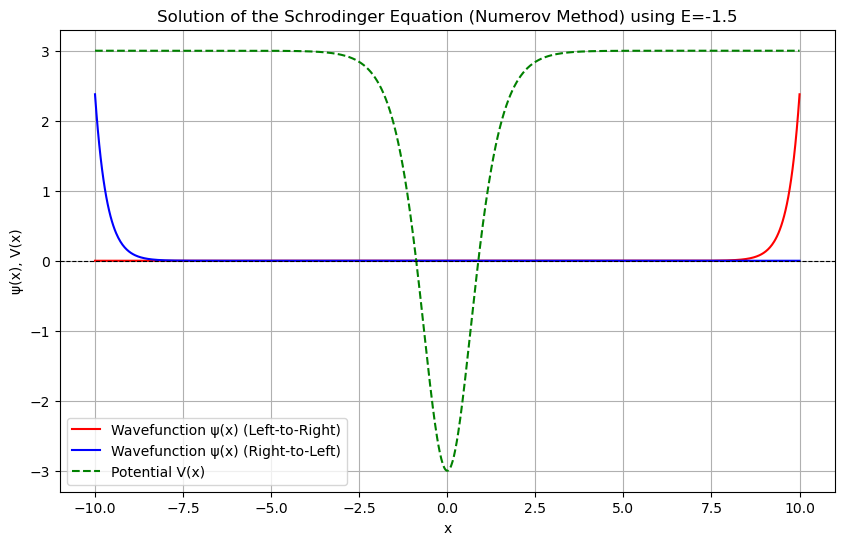

In [23]:
E = -1.5  # Trial energy level

# Solve the Schrodinger equation left-to-right
psi_lr = numerov(E, lambda x: V(x, m, hbar, l, alpha), x, h, direction="lr")

# Solve the Schrodinger equation right-to-left
psi_rl = numerov(E, lambda x: V(x, m, hbar, l, alpha), x, h, direction="rl")

# Normalize the wavefunctions
psi_lr_norm = psi_lr / np.sqrt(np.sum(psi_lr**2) * h)
psi_rl_norm = psi_rl / np.sqrt(np.sum(psi_rl**2) * h)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x, psi_lr_norm, color='red', label="Wavefunction \u03C8(x) (Left-to-Right)")
plt.plot(x, psi_rl_norm, color='blue', label="Wavefunction \u03C8(x) (Right-to-Left)")
plt.plot(x, V(x, m, hbar, l, alpha), label="Potential V(x)", linestyle="--", color="green")
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.title("Solution of the Schrodinger Equation (Numerov Method) using E=-1.5")
plt.xlabel("x")
plt.ylabel("\u03C8(x), V(x)")
plt.legend()
plt.grid()
plt.show()


We can see that inside the region of the turning points, both graph onverlap in a well manner. Thus we can conclude that the valid eigenvalues are $E=-1.5V, 1V and 2.5V$ 

Throughout the whole solutions, we have already use several methods to improve the accuracy. Using bisection methods, we are able to determine the potential barrier or the turning points of the potential well. Solving numerically the function $f(E)$, we can determine the exact eigenvalues. Lastly, to identify the correctness of the eigenvalues, Numerov algorithm is used to check the overlapping of the iteration of wavefunction from both direction.